# Image Processing


In [1]:
# Using these two images to pre-process, transform and using SVD method on
image1 = 'data/guna_2014.jpg'
image2 = 'data/robot_2.jpg'

### Reading the image


<class 'numpy.ndarray'>
(300, 200, 3)


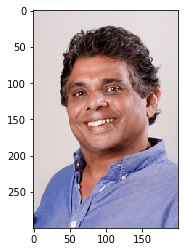

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# reding the image and making sure the dimensions of both the images match 
x = mpimg.imread(image1)
orgimage = plt.imshow(x)
print(type(x))
dimensions = x.shape
print(dimensions)
orgimage


### Splitting the image into Red, Green and Blue portions.
The shape and type of the image should indicate that it is a 3D ndarray (row,col,color). The color is an array (R,G,B) where each color is represented by 1 byte (unsigned with range 0-225). In order to perform matrix operatins, we need to split the image into Red, Green and Blue components. 

#### Red image

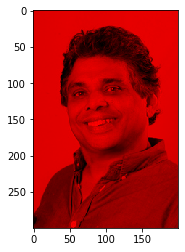

In [4]:
redimage = np.zeros(dimensions, int)
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        redimage[i][j][0] = x[i][j][0]
plotred = plt.imshow(redimage)


#### Green image

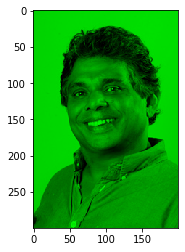

In [5]:
greenimage = np.zeros(dimensions, int)
for i in range(dimensions[0]):
    for j in range (dimensions[1]):
        greenimage[i][j][1]= x[i][j][1]
plotgreen = plt.imshow(greenimage)

#### Blue image

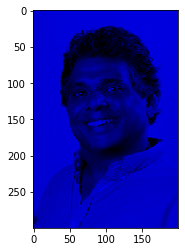

In [9]:
blueimage = np.zeros(dimensions,int)
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        blueimage[i][j][2] = x[i][j][2]
plotblue = plt.imshow(blueimage)

## Transforming images  

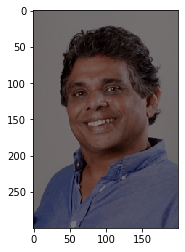

In [10]:
# Here we use for-loops to make our image brighter or darker. 
import numpy as np
p = 0.5
intensity = np.zeros(dimensions, int)
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        for k in range(dimensions[2]):
            intensity[i][j][k] = x[i][j][k] * p
dimplot = plt.imshow(intensity)


### Reading the second image and scaling


<class 'numpy.ndarray'>
(300, 200, 3)


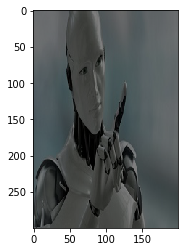

In [12]:
# Now I am reading our second image using the same approach above to make our image darker or brighter. 
robot = mpimg.imread(image2)
robotshow = plt.imshow(robot)
print(type(robot))
dimensionsrobot = robot.shape
print(dimensionsrobot)
p = 0.5
intensity1 = np.zeros(dimensionsrobot, int)
for i in range(dimensionsrobot[0]):
    for j in range(dimensionsrobot[1]):
        for k in range(dimensionsrobot[2]):
            intensity1[i][j][k] = robot[i][j][k] * (1-p)
plotrobot = plt.imshow(intensity1)

### Overlay images on each other. 

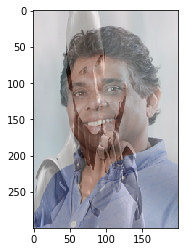

In [14]:
## Here I am overlaying the two images using matrix addition
p = 0.5
combine = np.zeros(dimensions, int)
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        for k in range (dimensions[2]):
            combine[i][j][k] = (x[i][j][k] * p) + (robot[i][j][k] * (1-p))
plotit = plt.imshow(combine)        

### Interactive panel design


In [15]:
# Initialize the widget
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

/bin/sh: jupyter: command not found


### Define a function f that allows us to generalize the use of alpha (p in previous examples)

In [16]:
##  BEGIN SOLUTION
def f(alpha):
    combine = np.zeros(dimensions, int)
    for i in range(dimensions[0]):
        for j in range(dimensions[1]):
            for k in range (dimensions[2]):
                combine[i][j][k] = (x[i][j][k] * alpha) + (robot[i][j][k] * (1-alpha))
    plotit = plt.imshow(combine)
##  END SOLUTION
    
interact(f, alpha=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

### Representation of matrices as 2D

In [17]:
# transform the RED, GREEN, BLUE matrices into a 2D matrices of red, green, blue color density
dimen = x.shape
R = np.zeros((dimen[0], dimen[1]), int)
G = np.zeros((dimen[0], dimen[1]), int)
B = np.zeros((dimen[0], dimen[1]), int)
# copy the corresponding values from 3D image 
for i in range(dimen[0]):
    R[i,:] = x[i, :, 0]
    G[i,:] = x[i, :, 1]
    B[i,:] = x[i, :, 2]
print(R, G, B)
# we can test to see if the dimensions of the image matrix are the same as original by doing the following
print(x.shape)
print(R.shape, G.shape, B.shape)

[[223 222 222 ... 229 229 229]
 [220 220 221 ... 229 229 227]
 [219 219 220 ... 229 229 229]
 ...
 [ 31  48  95 ... 142 148 135]
 [ 33  64  97 ... 140 142 131]
 [ 44  91  98 ... 139 129 125]] [[215 213 213 ... 223 223 223]
 [211 211 212 ... 220 220 221]
 [210 210 209 ... 220 220 220]
 ...
 [ 38  54 105 ... 147 151 141]
 [ 42  74 108 ... 146 148 137]
 [ 56 101 109 ... 145 135 130]] [[213 214 214 ... 223 223 223]
 [212 212 213 ... 221 221 221]
 [211 213 213 ... 221 221 221]
 ...
 [ 93 112 167 ... 202 202 189]
 [101 133 170 ... 198 200 189]
 [116 162 171 ... 195 187 186]]
(300, 200, 3)
(300, 200) (300, 200) (300, 200)


### Finding Singular values and Orthogonal matrices
Find the singular value decomposition of matrices R, G, B. Listing the singular values (S) and the orthogonal matrices (U, V) for colors R,G,B as (UR,sR, VhR), (UG,sG, VhG), (UB,sB, VhB).  

In [19]:
from scipy import linalg

# All of the singular values (S) and the orthogonal matrices (U,V) are listed below
UR, sR, VhR = linalg.svd(R)
UG, sG, VhG = linalg.svd(G)
UB, sB, VhB = linalg.svd(B)

print(sR, sG, sB)

[4.22991941e+04 6.71373184e+03 5.28570763e+03 3.44764237e+03
 3.01387219e+03 2.71743671e+03 2.06169067e+03 1.66528020e+03
 1.55103940e+03 1.39162369e+03 1.25181939e+03 1.08523242e+03
 1.05021802e+03 9.90946136e+02 9.29450286e+02 8.84585469e+02
 8.63093661e+02 7.90307337e+02 7.74042006e+02 7.39216356e+02
 7.10512883e+02 6.68657431e+02 6.31682595e+02 6.27599743e+02
 5.92306108e+02 5.54957293e+02 5.52676462e+02 5.31723168e+02
 5.20382641e+02 4.97507852e+02 4.86950427e+02 4.64434592e+02
 4.46769942e+02 4.39477803e+02 4.08709103e+02 4.08286416e+02
 4.00898641e+02 3.87687627e+02 3.70596858e+02 3.66243417e+02
 3.53094034e+02 3.37708447e+02 3.35102541e+02 3.28359160e+02
 3.12063784e+02 3.07869834e+02 3.03754310e+02 2.99902412e+02
 2.85830187e+02 2.77444977e+02 2.72359538e+02 2.61495315e+02
 2.58208125e+02 2.53619258e+02 2.49597532e+02 2.48938723e+02
 2.42488976e+02 2.34809957e+02 2.28316757e+02 2.26387872e+02
 2.19743169e+02 2.15650939e+02 2.11813068e+02 2.05856571e+02
 2.04655804e+02 2.014622

### Finding a rank-1 approximation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


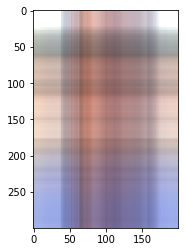

In [21]:
## Find the rank-1 approximation and show the image generated by it.

rank1R = UR[:, 0].reshape(len(UR[:, 0]), 1) * sR[0] * VhR[0, :]
rank1G = UG[:, 0].reshape(len(UG[:, 0]), 1) * sG[0] * VhG[0, :]
rank1B = UB[:, 0].reshape(len(UB[:, 0]), 1) * sB[0] * VhB[0, :]

approx1 = np.zeros(dimen, int)

for i in range(dimen[0]):
    approx1[i, : ,0] = rank1R[i, :]
    approx1[i, : ,1] = rank1G[i, :] 
    approx1[i, : ,2] = rank1B[i, :] 
    
plt.imshow(approx1)


### Finding a rank-2 approximation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


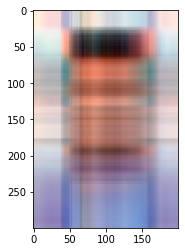

In [22]:
## Find the rank-2 approximation and show the image generated by it.
rank1R = UR[:, 0].reshape(len(UR[:, 0]), 1) * sR[0] * VhR[0, :]
rank1G = UG[:, 0].reshape(len(UG[:, 0]), 1) * sG[0] * VhG[0, :]
rank1B = UB[:, 0].reshape(len(UB[:, 0]), 1) * sB[0] * VhB[0, :]

rank2R = UR[:, 1].reshape(len(UR[:, 0]), 1) * sR[1] * VhR[1, :]
rank2G = UG[:, 1].reshape(len(UG[:, 0]), 1) * sG[1] * VhG[1, :]
rank2B = UB[:, 1].reshape(len(UB[:, 0]), 1) * sB[1] * VhB[1, :]

approx2 = np.zeros(dimen, int)
for i in range(dimen[0]):
    approx2[i, : ,0] = rank1R[i, :] + rank2R[i, :] 
    approx2[i, : ,1] = rank1G[i, :] + rank2G[i, :]
    approx2[i, : ,2] = rank1B[i, :] + rank2B[i, :]

plt.imshow(approx2)


### Finding a rank-k approximation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


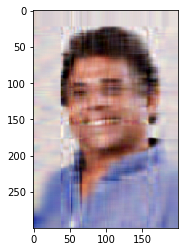

In [23]:
## Find the rank-k approximation and show the image generated by it.

k = 10
generalize = 0
j = 0
for i in range(0, k):
    while(j < k):
        #Red values
        column = UR[:, j].reshape(300,1)
        row = VhR.T[:,j].reshape(1, 200)
        rankR = sR[j] * column * row
        
        #Green values
        column = UG[:, j].reshape(300,1)
        row = VhG.T[:,j].reshape(1,200)
        rankG = sG[j] * column * row
        
        #Blue values
        column = UB[:, j].reshape(300,1)
        row = VhB.T[:,j].reshape(1,200)
        rankB = sB[j] * column * row

        generalize = generalize + np.dstack((rankR, rankG, rankB))
        generalize = generalize.astype(int)
        j = j + 1

plt.imshow(generalize)